In [50]:
# # Importing Packages
# from qiskit import IBMQ, Aer
# from qiskit.providers.ibmq import least_busy
# from qiskit import QuantumCircuit, transpile, assemble, QuantumRegister, ClassicalRegister
# from qiskit.visualization import plot_histogram
# from qiskit_textbook.tools import simon_oracle

#initialization
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# importing Qiskit
from qiskit import Aer, IBMQ
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
# from qiskit import execute, register, get_backend
# , compile
# from qiskit.wrapper.jupyter import *

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

In [11]:
s =  input("Enter the input string:\n")

Enter the input string:
101


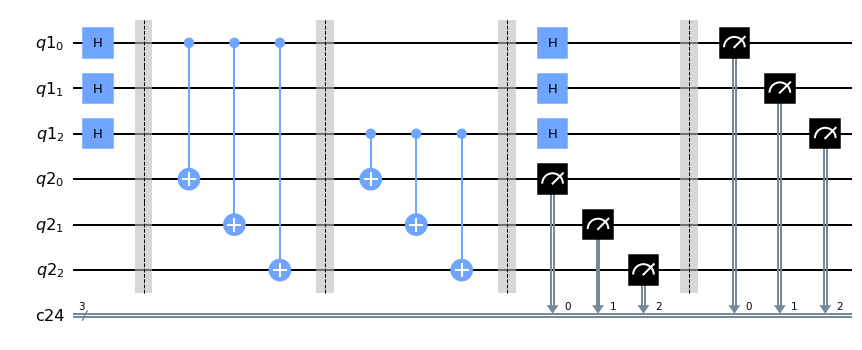

In [43]:
# n = len(s)
# # creating quantum circuit
# q1=QuantumRegister(n,'q1')
# q2=QuantumRegister(n,'q2')
# c1=ClassicalRegister(n)
# qc = QuantumCircuit(q1,q2,c1)
# qc.h(q1)
# qc.barrier()
# # qc.cx(q1, q2)
# # qc.barrier()
# # l=list(range(n))
# # print(l)
# # for k in range(n):
# #     if s[k]=="1":
# qc.cx(q1[0],q2[0])
# qc.cx(q1[0],q2[1])
# qc.cx(q1[0],q2[2])

# qc.barrier()
# qc.cx(q1[2],q2[0])
# qc.cx(q1[2],q2[1])
# qc.cx(q1[2],q2[2])
# qc.barrier()
# qc.measure(q2,c1)
# qc.h(q1)
# qc.barrier()
# qc.measure(q1,c1)

# # q1 = QuantumRegister(n,'q1')
# # q2 = QuantumRegister(n,'q2')
# # c1 = ClassicalRegister(n)
# # qc = QuantumCircuit (q1, q2, c1)
# # # applying H-gate on qubits of first register
# # qc.h(q1)
# # qc.barrier()
# # # copying the data of first register to second register
# # qc.cx(q1, q2)
# # qc.barrier()
# # # applying bit wise X-OR from register 1 to register 2 where qubits of first register is 1
# # qc.cx(q1[0],q2[0])
# # qc.cx(q1[0],q2[2])
# # qc.barrier()
# # # measuring qubits of second register
# # qc.measure(q2,c1)
# # # applying H-gate to qubits of first register
# # qc.h(q1)
# # qc.barrier()
# # # measuring qubits of first register
# # qc.measure(q1, c1)
# qc.draw()
# qc.draw(output="mpl")

{'101': 539, '000': 485}


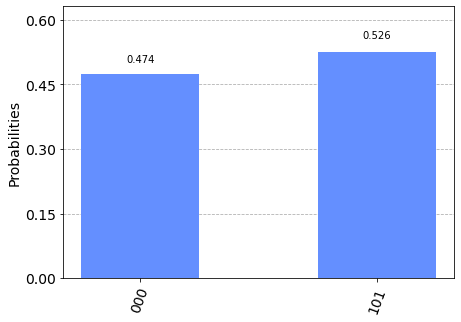

In [44]:
# # running the circuit using "qasm simulator"
# qasm_sim = Aer.get_backend("qasm_simulator")
# job = assemble(qc,qasm_sim)
# result = qasm_sim.run(job).result()
# con = result.get_counts()
# print(con)
# plot_histogram(con)

In [51]:
# Step 1
# Creating registers
# qubits for querying the oracle and recording its output
n=len(s)
qr = QuantumRegister(2*n)
# for recording the measurement on the first register of qr
cr = ClassicalRegister(n)

circuitName = "Simon"
simonCircuit = QuantumCircuit(qr, cr)

# Step 2
# Apply Hadamard gates before querying the oracle
for i in range(n):
    simonCircuit.h(qr[i])

# Apply barrier to mark the beginning of the blackbox function
simonCircuit.barrier()

In [52]:
# Step 3 query the blackbox function
# copy the content of the first register to the second register
for i in range(n):
    simonCircuit.cx(qr[i], qr[n+i])

# get the least index j such that s_j is "1"
j = -1
for i, c in enumerate(s):
    if c == "1":
        j = i
        break

# Creating 1-to-1 or 2-to-1 mapping with the j-th qubit of x as control to XOR the second register with s
for i, c in enumerate(s):
    if c == "1" and j >= 0:
        simonCircuit.cx(qr[j], qr[n+i]) #the i-th qubit is flipped if s_i is 1

# get random permutation of n qubits
perm = list(np.random.permutation(n))

#initial position
init = list(range(n))
i = 0
while i < n:
    if init[i] != perm[i]:
        k = perm.index(init[i])
        simonCircuit.swap(qr[n+i], qr[n+k]) #swap qubits
        init[i], init[k] = init[k], init[i] #marked swapped qubits
    else:
        i += 1
        
# randomly flip the qubit
for i in range(n):
    if np.random.random() > 0.5:
        simonCircuit.x(qr[n+i])

# Apply the barrier to mark the end of the blackbox function
simonCircuit.barrier()

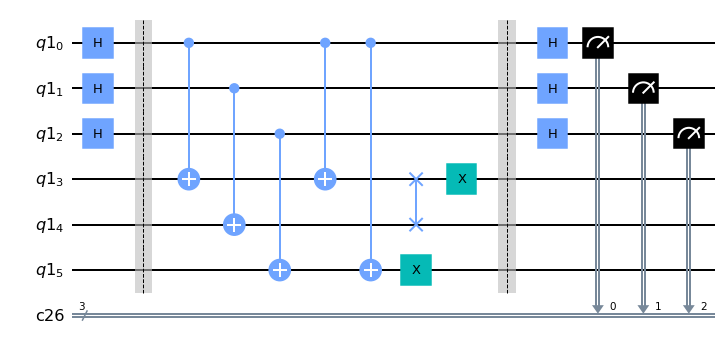

In [53]:
# Step 4 apply Hadamard gates to the first register
for i in range(n):
    simonCircuit.h(qr[i])
    
# Step 5 perform measurement on the first register
for i in range(n):
    simonCircuit.measure(qr[i], cr[i])

#draw the circuit
# from qiskit.tools.visualization import circuit_drawer
# circuit_drawer(simonCircuit)
simonCircuit.draw(output="mpl")

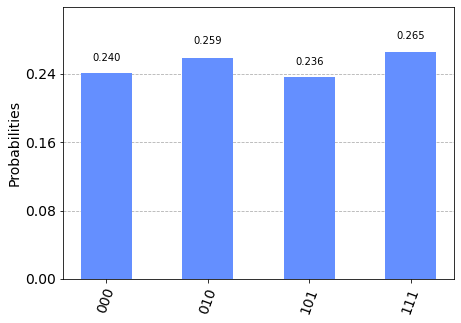

In [54]:
# use local simulator
backend = Aer.get_backend("qasm_simulator")
# the number of shots is twice the length of the bitstring
shots = 1024
job = execute(simonCircuit, backend=backend, shots=shots)
answer = job.result().get_counts()

plot_histogram(answer)

# References
[Medium Article by Mr. Asif](https://medium.com/codex/implementing-simons-algorithm-in-qiskit-9155ce6a9527)

[Notebook.community](https://notebook.community/antoniomezzacapo/qiskit-tutorial/community/algorithms/simon_algorithm)

[Qiskit Simon Source Code](https://qiskit.org/documentation/stable/0.19/_modules/qiskit/aqua/algorithms/education/simon.html#Simon)

[QuantuC](https://www.youtube.com/watch?v=7hYQzIHhDXA)

[QC Stackexchange-1](https://quantumcomputing.stackexchange.com/questions/6586/coding-an-oracle-for-simons-algorithm?rq=1)

[QC Stackexchange-2](https://quantumcomputing.stackexchange.com/questions/15567/in-simons-algorithm-is-there-a-general-method-to-define-an-oracle-given-a-cert)